# The Sparks Foundation

# Data Science & Business Analytics Tasks Intern JAN2021

# Name : Nisarg Patel

# Task 6 : Prediction using Decision Tree Algorithm

Problem Statement : The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

In [1]:
# import pyforest <--> if you don't want to import all the libraries explicitly.

In [2]:
##importing necessary libraries

import numpy
import pandas as pd
from sklearn import datasets as dt
from sklearn import metrics as mt 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV 
from sklearn import tree as T
from sklearn.tree import DecisionTreeClassifier 
from sklearn.utils import shuffle

%matplotlib inline

In [3]:
#fetching data from dataset

X,Y=dt.load_iris(return_X_y=True)

iris_data=dt.load_iris()

In [4]:
#printing first 5 entries of dataset

iris_df=pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df=iris_df.sample(frac=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
141,6.9,3.1,5.1,2.3
8,4.4,2.9,1.4,0.2
100,6.3,3.3,6.0,2.5
18,5.7,3.8,1.7,0.3
96,5.7,2.9,4.2,1.3


In [5]:
#describing all details of the data

print(iris_df.shape)
iris_df.describe()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0, 0.5, 'sepal width (cm)')

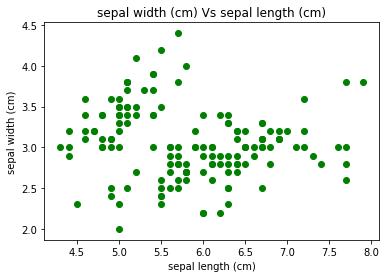

In [6]:
#plotting the data according to features "SEPAL"

x=iris_df["sepal length (cm)"]
y=iris_df["sepal width (cm)"]
plt.scatter(x,y,color='green')
plt.title('sepal width (cm) Vs sepal length (cm)')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

Text(0, 0.5, 'petal width (cm)')

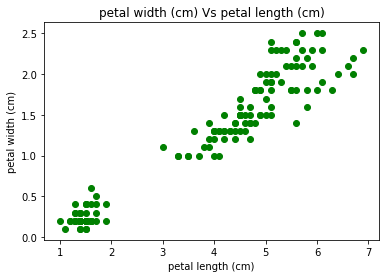

In [7]:
#plotting the data according to features "PETAL"

x=iris_df["petal length (cm)"]
y=iris_df["petal width (cm)"]
plt.scatter(x,y,color='green')
plt.title('petal width (cm) Vs petal length (cm)')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [8]:
# shuffling and spliting the dataset two same sized part for testing and training

X,Y = shuffle(X,Y, random_state=0)

X_train=X[range(0,150,2),:]
Y_train=Y[range(0,150,2)]

X_test=X[range(1,150,2),:]
Y_test=Y[range(1,150,2)]

In [9]:
# training model and get all data relating to accuracy 

# Decision_Tree=DecisionTreeClassifier(criterion='entropy')
Decision_Tree=DecisionTreeClassifier() # by default it's a based on gini index

Decision_Tree.fit(X_train,Y_train)
prediction=Decision_Tree.predict(X_test)
print(prediction)

print("\nAccuracy with normalize = ",mt.accuracy_score(Y_test,prediction,normalize=True))
print(mt.classification_report(Y_test,prediction))
print(mt.confusion_matrix(Y_test,prediction))

[1 2 2 1 1 1 1 0 1 0 1 0 0 1 0 1 2 1 2 1 0 0 1 2 2 2 1 2 2 2 0 1 1 2 0 1 0
 0 1 1 1 2 2 0 2 0 0 2 0 0 0 2 0 0 1 0 0 1 1 2 2 0 0 1 1 2 2 1 2 1 2 0 0 1
 0]

Accuracy with normalize =  0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      0.90      0.95        30
           2       0.86      1.00      0.93        19

    accuracy                           0.96        75
   macro avg       0.95      0.97      0.96        75
weighted avg       0.97      0.96      0.96        75

[[26  0  0]
 [ 0 27  3]
 [ 0  0 19]]


[Text(133.92000000000002, 190.26, 'X[2] <= 2.6\ngini = 0.656\nsamples = 75\nvalue = [24, 20, 31]'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 24\nvalue = [24, 0, 0]'),
 Text(200.88000000000002, 135.9, 'X[3] <= 1.65\ngini = 0.477\nsamples = 51\nvalue = [0, 20, 31]'),
 Text(133.92000000000002, 81.53999999999999, 'X[2] <= 4.95\ngini = 0.227\nsamples = 23\nvalue = [0, 20, 3]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 20\nvalue = [0, 20, 0]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

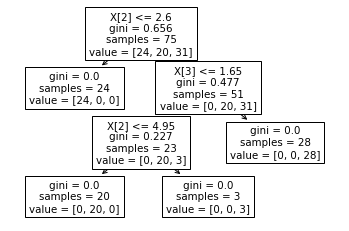

In [10]:
# plotting the decision tree for this classification

T.plot_tree(Decision_Tree) 

In [11]:
# tuning hyper-parameter with GridsearchCV 

params = {
        'max_leaf_nodes': list(range(2, 100)), 
        'min_samples_split': [2, 3, 4]}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3).fit(X_train,Y_train)

print(grid.best_params_)
print()
print(grid.best_estimator_)
print(grid.predict(X_test))
print()
print(mt.accuracy_score(Y_test,grid.predict(X_test),normalize=True))

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'max_leaf_nodes': 4, 'min_samples_split': 2}

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
[1 2 2 1 1 1 1 0 1 0 1 0 0 1 0 1 2 1 2 1 0 0 1 2 2 2 1 2 2 2 0 1 1 2 0 1 0
 0 1 1 1 2 2 0 2 0 0 2 0 0 0 2 0 0 1 0 0 1 1 2 2 0 0 1 1 2 2 1 2 1 2 0 0 1
 0]

0.96


[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    2.2s finished


[Text(133.92000000000002, 181.2, 'X[2] <= 2.6\ngini = 0.656\nsamples = 75\nvalue = [24, 20, 31]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 24\nvalue = [24, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 1.65\ngini = 0.477\nsamples = 51\nvalue = [0, 20, 31]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.227\nsamples = 23\nvalue = [0, 20, 3]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

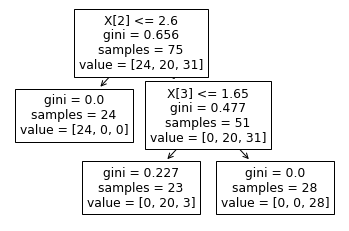

In [12]:
# plotting the decision tree with tuning hyper parameter

Decision_Tree=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Decision_Tree.fit(X_train,Y_train)
prediction=Decision_Tree.predict(X_test)

T.plot_tree(Decision_Tree) 